In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
from sklearn import utils

from sklearn.datasets import load_boston

%matplotlib inline

In [2]:
boston= load_boston()
y= pd.DataFrame(boston.target, columns=["Target_price"])
X= pd.DataFrame(boston.data, columns=boston.feature_names)

C:\Users\ellomo19\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing datase

In [3]:
y.head()

,Target_price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [4]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

In [6]:
#KNN
knn= KNeighborsRegressor().fit(X_train, y_train)
y_hat_knn= knn.predict(X_test)
y_hat_knn=(y_hat_knn).flatten()

In [7]:
#LinearRegression
lir= LinearRegression().fit(X_train, y_train)
y_hat_lir= lir.predict(X_test)
y_hat_lir=(y_hat_lir).flatten()

In [8]:
#Lasso
lasso= Lasso().fit(X_train, y_train)
y_hat_lasso= lasso.predict(X_test)
y_hat_lasso=(y_hat_lasso).flatten()

In [9]:
#Ridge
ri= Ridge().fit(X_train, y_train)
y_hat_ri= ri.predict(X_test)
y_hat_ri=(y_hat_ri).flatten()

In [10]:
#ElasticNet
en= ElasticNet().fit(X_train, y_train)
y_hat_en= en.predict(X_test)
y_hat_en=(y_hat_en).flatten()

In [11]:
#LogisticRegression
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(y_train)
lor= LogisticRegression().fit(X_train, y_transformed)
y_hat_lor= lor.predict(X_test)

C:\Users\ellomo19\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ellomo19\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [12]:
#DecisionTree
dtree= DecisionTreeRegressor().fit(X_train, y_train)
y_hat_dtree= dtree.predict(X_test)

In [13]:
#RandomForest
rand= RandomForestRegressor().fit(X_train, y_train)
y_hat_rand= rand.predict(X_test)

C:\Users\ellomo19\AppData\Local\Temp\ipykernel_15816\3821949461.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rand= RandomForestRegressor().fit(X_train, y_train)


In [14]:
#XGBoost
xgbm= XGBRegressor().fit(X_train, y_train)
y_hat_xgbm= xgbm.predict(X_test)

In [15]:
df_hats= pd.DataFrame(data=[y_hat_knn, y_hat_lir, y_hat_lasso, y_hat_ri, y_hat_lor, y_hat_dtree, y_hat_rand, y_hat_xgbm])
df_hats

,0,1,2,3,4,5,6,7,8,9,...,92,93,94,95,96,97,98,99,100,101
0,30.460000,30.700000,21.720000,26.340000,30.340000,17.660000,37.640000,16.480000,22.540000,24.840000,...,15.160000,20.500000,10.560000,20.440000,21.080000,26.760000,30.680000,22.300000,12.880000,15.840000
1,32.655032,28.093495,18.029018,21.476716,18.825439,19.879978,32.420149,18.065978,24.422778,27.009778,...,14.111315,23.257361,14.663027,21.869772,23.025276,29.089918,37.119379,20.532710,17.368400,17.713993
2,30.798187,28.618170,17.964730,23.055233,24.371706,21.183891,31.741681,20.431533,21.608245,26.300548,...,13.169405,24.900467,16.166091,24.254367,23.268625,27.960598,31.878409,19.661706,16.333786,17.484240
3,32.511398,28.265232,17.528444,21.330290,19.680651,20.055088,32.383830,18.292901,23.712755,26.918769,...,13.420887,23.209437,14.831992,21.782753,23.573650,28.520620,36.926312,20.647504,16.697099,18.279827
4,160.000000,209.000000,109.000000,135.000000,209.000000,86.000000,164.000000,51.000000,78.000000,75.000000,...,91.000000,119.000000,10.000000,79.000000,93.000000,109.000000,209.000000,102.000000,21.000000,36.000000
5,33.000000,33.000000,21.700000,18.900000,16.100000,18.200000,24.500000,19.600000,17.800000,22.000000,...,17.400000,21.200000,21.400000,19.300000,24.400000,21.600000,37.600000,21.200000,11.700000,23.200000
6,29.933000,27.493000,19.280000,20.730000,19.470000,19.497000,28.045000,18.939000,20.060000,23.581000,...,16.512000,21.398000,15.665000,20.707000,24.550000,23.320000,43.161000,20.858000,16.160000,15.128000
7,30.359884,27.026636,19.176161,21.448114,20.703493,20.424747,27.903601,17.878405,21.678137,23.365129,...,15.133404,20.947332,14.996857,20.791437,24.775454,23.958286,45.176277,22.567810,15.780695,16.750847


In [16]:
df_hats= df_hats.T
df_hats.columns= ["y_hat_knn", "y_hat_lir", "y_hat_lasso", "y_hat_ri", "y_hat_lor", "y_hat_dtree", "y_hat_rand", "y_hat_xgbm"]
df_hats

,y_hat_knn,y_hat_lir,y_hat_lasso,y_hat_ri,y_hat_lor,y_hat_dtree,y_hat_rand,y_hat_xgbm
0,30.46,32.655032,30.798187,32.511398,160.0,33.0,29.933,30.359884
1,30.70,28.093495,28.618170,28.265232,209.0,33.0,27.493,27.026636
2,21.72,18.029018,17.964730,17.528444,109.0,21.7,19.280,19.176161
3,26.34,21.476716,23.055233,21.330290,135.0,18.9,20.730,21.448114
4,30.34,18.825439,24.371706,19.680651,209.0,16.1,19.470,20.703493
...,...,...,...,...,...,...,...,...
97,26.76,29.089918,27.960598,28.520620,109.0,21.6,23.320,23.958286
98,30.68,37.119379,31.878409,36.926312,209.0,37.6,43.161,45.176277
99,22.30,20.532710,19.661706,20.647504,102.0,21.2,20.858,22.567810
100,12.88,17.368400,16.333786,16.697099,21.0,11.7,16.160,15.780695


In [17]:
from sklearn.metrics import r2_score

In [18]:
df_results=[]
for i in df_hats.columns:
    r2= r2_score(y_test, df_hats[i])
    df_results.append(r2)
print(df_results)

[0.5401612153026705, 0.7634174432138463, 0.6399927356461494, 0.7655800611077146, -96.61567720432953, 0.8283142457398568, 0.9086223720933869, 0.9085331557145866]


In [28]:
df_results= pd.DataFrame(data=df_results)
df_results = df_results.T
df_results.columns=["y_hat_knn", "y_hat_lir", "y_hat_lasso", "y_hat_ri", "y_hat_lor", "y_hat_dtree", "y_hat_rand", "y_hat_xgbm"]

ValueError: Length mismatch: Expected axis has 1 elements, new values have 8 elements

In [ ]:
fig, ax= plt.subplots(figsize=(15,8))
plt.bar(df_results.columns, sorted(df_results.T[0]), color="green")
plt.ylabel("r2 score")
plt.xlabel("Model")

In [ ]:
def gs_best(params, model, model_name):
    gs=GridSearchCV(model(), params, cv=5, n_jobs=1, verbose=1)
    gs.fit(X_train, y_train)
    best= model(**gs.best_params_).fit(X_train, y_train)
    y_hat= best.predict(X_test)
    r2=r2_score(y_test, y_hat)
    
    return model_name, r2

In [ ]:
knn_params= {"n_neighbors":[3,5,7,9], "metric":["manhattan", "euclidean"], "weights":["uniform", "distance"]}

In [ ]:
(model, r2_knn)= gs_best(knn_params, KNeighborsRegressor, "KNN")
r2_knn

In [29]:
params_xgbm={"max_depth":[4,5], "n_estimators":[10,20,30], "learning_rate":[0.3,0.03]}

In [30]:
(model, r2_xgbm)= gs_best(params_xgbm, xgb.XGBRegressor, "XGBM")
r2_xgbm

Fitting 5 folds for each of 12 candidates, totalling 60 fits


0.9177082576000329

In [31]:
def gs_best1(params, model, model_name):
    gs=GridSearchCV(model(), params, cv=5, n_jobs=1, verbose=1)
    gs.fit(X_train, y_train)
    best= model(**gs.best_params_).fit(X_train, y_train)
    y_hat= best.predict(X_test)
    r2=r2_score(y_test, y_hat)
    
    return best, r2

In [32]:
params_xgbm1={"max_depth":[1], "learning_rate":[0.3,0.03]}
(model1, r2_xgbm1)= gs_best1(params_xgbm1, xgb.XGBRegressor, "XGBM1")
r2_xgbm1

Fitting 5 folds for each of 2 candidates, totalling 10 fits


0.8532663386170671

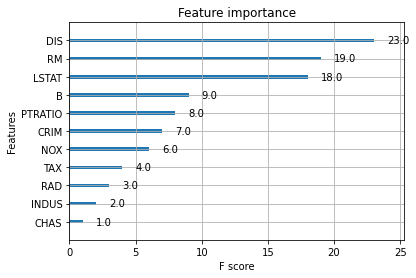

In [33]:
f_imp= xgb.plot_importance(model1)

In [34]:
from xgboost import plot_tree

NameError: name 'model_' is not defined

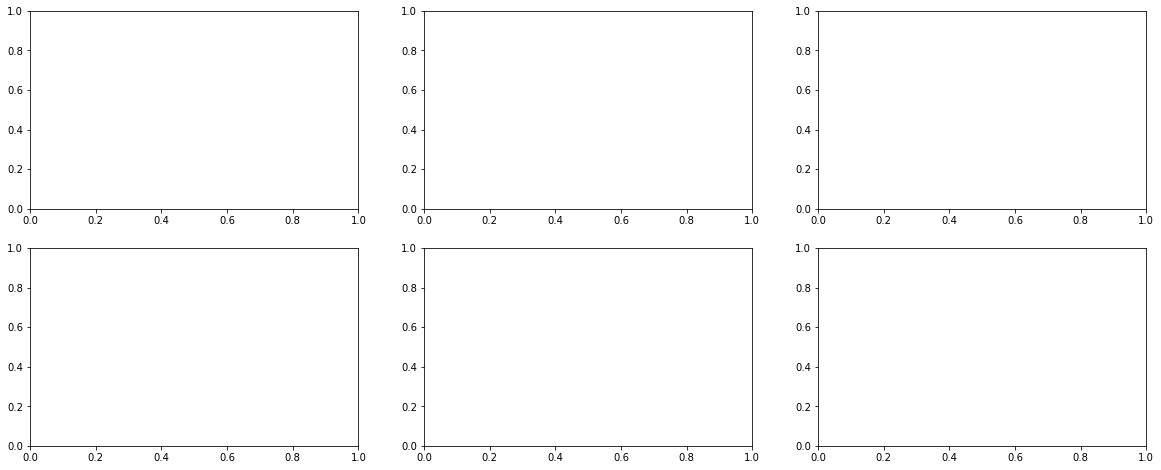

In [35]:
fig, axs= plt.subplots(2,3, figsize=(20,8))
axs= axs.flatten()
for i in range (6):
    tree= model_[i]
    plot_tree(model_[i], max_depth=2, ax=axs[i])

In [36]:
trees = np.arange(1,101) #Number of trees
accuracy= np.empty(100) #Matrix for acc

for i in range(100): #Number of models
    model= XGBRegressor(n_estimators=trees[i]).fit(X_train, y_train)
    accuracy_values = model.score(X_test, y_test)
    accuracy[i]= accuracy_values

print(accuracy)

[-2.05905702 -0.59037847  0.14254999  0.50518527  0.6878785   0.79081257
  0.84121158  0.86835477  0.885107    0.89523301  0.89928121  0.90086942
  0.90317232  0.90346091  0.90688663  0.90705597  0.90864009  0.91012082
  0.90916692  0.91006345  0.90928446  0.90946911  0.90889852  0.9090884
  0.90970787  0.9102894   0.90959952  0.90983579  0.90993639  0.90950649
  0.90939737  0.9088153   0.90872959  0.90856892  0.90883809  0.90896712
  0.90915352  0.90921371  0.9094781   0.90953725  0.90936797  0.90932763
  0.9092448   0.90913569  0.90933826  0.9089936   0.90889087  0.90900401
  0.90900541  0.90915139  0.9091428   0.90884569  0.90883746  0.90870728
  0.9087177   0.90871982  0.90872622  0.9087528   0.90873529  0.9087778
  0.90872024  0.90863271  0.90862508  0.90863484  0.90864375  0.90866256
  0.90868728  0.90869119  0.90870055  0.90872175  0.90868715  0.90864316
  0.90861992  0.90860981  0.90865297  0.908683    0.90865758  0.90867506
  0.9086953   0.90870453  0.90869809  0.90867292  0.9

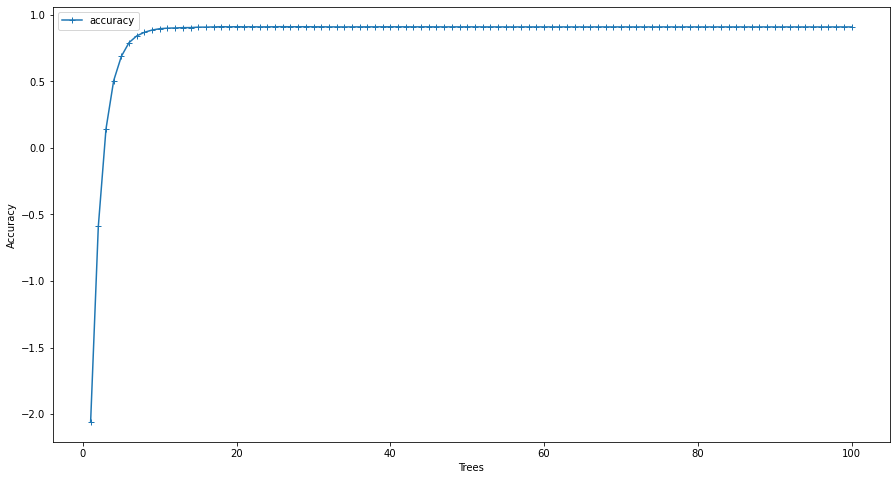

In [38]:
plt.figure(figsize=(15,8))
plt.plot(trees, accuracy, label="accuracy", marker="+")
plt.xlabel("Trees")
plt.ylabel("Accuracy")
plt.legend()